# BeautifulSoup Parse & Extract Data

## 5-1 Use BeautifulSoup to extract web data
* Python can use BeautifulSoup analysize HTML, and get the target data from  it

### 5-1-1 BeautifulSoup Basic Usage

In [7]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [9]:
# usage:
# from bs4 import BeautifulSoup

# soup = BeautifulSoup(contents, "lxml")

* 1st parameter is HTML contends downloaded
* 2nd parameter is the parser, lxml is faster than the default "html.parser"

from soup object extract target tag: ("a" is hyperlink tag)

In [10]:
# tags = soup("a")

After get all "a" tag object, we can loop it:

In [11]:
# for tag in tags
#     print(tag.get("href", None))

### Sample code:

In [28]:
pip install requests


     -------------------------------------- 62.8/62.8 kB 674.4 kB/s eta 0:00:00


In [29]:
import requests
from bs4 import BeautifulSoup 

url = "https://fchart.github.io/"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    tags = soup("a")
    for tag in tags:
        print(tag.get("href", None))
else:
    print("Error! HTTP request fail...")



#page-top
#fchart
#flowchart
#codeeditor
#python
#node
#arduino
#ardublockly
#microbit
#doc
#
https://hueyanchen.github.io/
http://blockly.is-best.net/
https://fchart.github.io/MyMind/index_zh-Hant.html
https://drive.google.com/file/d/1NKyh1nl1vwyhHf7mOLj7cxb2g6SpSx57/view?usp=sharing
https://drive.google.com/file/d/1PeCYYT-xA3v9Wn7LiwM2wq8ltvJVwGqY/view?usp=sharing
https://github.com/fchart/fChartExamples2
https://fchart.github.io/fChart6%E4%BD%BF%E7%94%A8%E6%89%8B%E5%86%8A.pdf
https://fchart.github.io/tutorial/
https://fchart.github.io
http://fchart.is-best.net
https://fchart.github.io/fChart6%E4%BD%BF%E7%94%A8%E6%89%8B%E5%86%8A.pdf
#
https://drive.google.com/file/d/1NKyh1nl1vwyhHf7mOLj7cxb2g6SpSx57/view?usp=sharing
fChart使用說明.htm
#
#
#
https://drive.google.com/file/d/1NKyh1nl1vwyhHf7mOLj7cxb2g6SpSx57/view?usp=sharing
https://hueyanchen.github.io/
fChart使用說明.htm
https://drive.google.com/file/d/1VspHydl48PIoeVT7sjw4Gx307UrJUNHB/view?usp=sharing
https://mega.nz/file/SNlw2TyY#XUIiHxhjY9

### 5-1-2 Get related infomation of HTML tag

* After get the specific tag, we can use the following property to get related data 
* (Steven) taget: can check W3C doc: https://www.w3schools.com/tags/att_a_target.asp

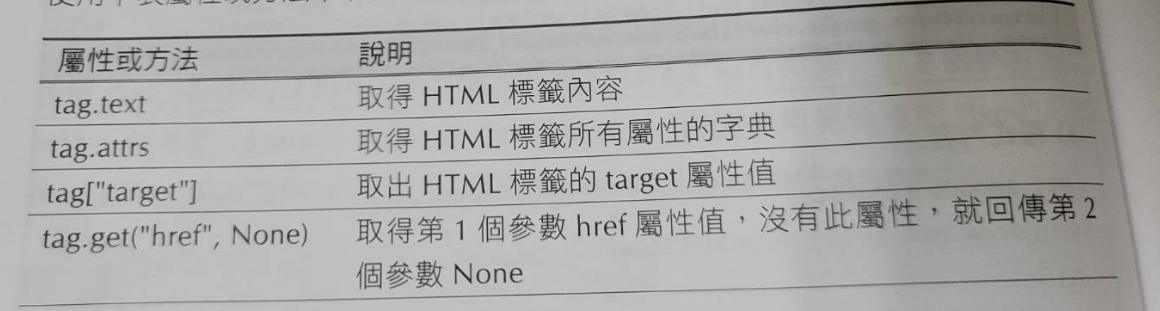

Ex,

In [51]:
import requests 
from bs4 import BeautifulSoup

url = "https://fchart.github.io/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
tags = soup("a")
tag = tags[12]
print("----------------")
print("tag:", tag)
print("----------------")
print("URL: ", tag.get("href", None))
print("Tag Content: ", tag.text)
print("target Property: ", tag["target"])
tags = soup("img")
tag = tags[1]
print("----------------")
print("tag:", tag)
print("----------------")
print("Image URL: ", tag.get("src", None))
print("alt property: ", tag["alt"])
print("Property: ", tag.attrs)




----------------
tag: <a class="btn btn-info" href="http://blockly.is-best.net/" style="font-size:small" target="_blank"><b>ESP8266 Blockly for MicroPython 英文線上版</b></a>
----------------
URL:  http://blockly.is-best.net/
Tag Content:  ESP8266 Blockly for MicroPython 英文線上版
target Property:  _blank
----------------
tag: <img alt="fChart直譯器圖例" class="img-fluid rounded mb-3 mb-md-0" src="img/fchart01.png"/>
----------------
Image URL:  img/fchart01.png
alt property:  fChart直譯器圖例
Property:  {'class': ['img-fluid', 'rounded', 'mb-3', 'mb-md-0'], 'src': 'img/fchart01.png', 'alt': 'fChart直譯器圖例'}


### 5-1-3 Use BeautifulSoup to Search HTML Tag

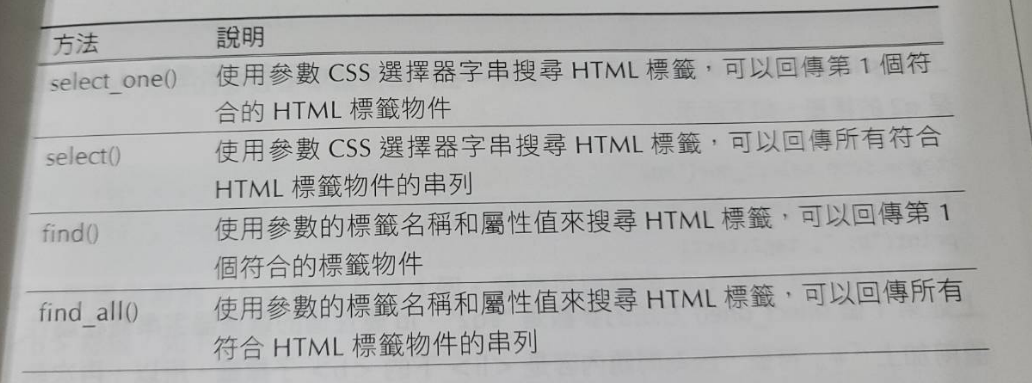

* in this episode we will use: https://fchart.github.io/Elements.html to test
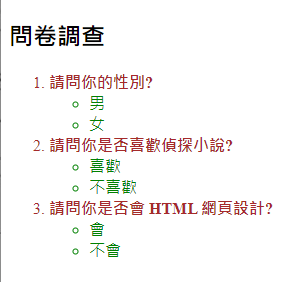

1. Use select() & select_one() to search HTML tag:

In [31]:
import requests
from bs4 import BeautifulSoup 

url = "https://fchart.github.io/Elements.html"
response = requests.get(url)
print("*********************")
print("HTML", response.text)
print("*********************")
soup = BeautifulSoup(response.text, "lxml")
tag = soup.select_one("h2")
print("h2: ", tag.text)
tags = soup.select("b")
print("b: ", tags[0].text)
tag = soup.select_one("#q2")
tag2 = tag.select_one("b")
print("b: ", tag2.text)
tags = soup.select(".response")
print("li: ", tags[0].text)
print("li: ", tags[1].text)
print("li: ", tags[2].text)
print("li: ", tags[3].text)



*********************
HTML <!DOCTYPE html>
<html lang="big5">
 <head>
  <meta charset="utf-8"/>
  <title>HTML清單標籤</title>
  <style>
  .question { color: brown }
  .answer { font-size: 12pt; color: green }
  </style>  
 </head>
 <body>
   <h2 id="main">問卷調查</h2>
   <ol id="survey" class="survey">
    <li id="q1" class="question"><b>請問你的性別?</b>
      <ul class="answer">
        <li class="response">男</li>
        <li class="response selected">女</li>
      </ul>
    </li>
    <li id="q2" class="question"><b>請問你是否喜歡偵探小說?</b>
      <ul class="answer">
        <li class="response">喜歡</li>
        <li class="response selected">不喜歡</li>
      </ul>
    </li>
    <li id="q3" class="question"><b>請問你是否會 HTML 網頁設計?</b>
      <ul class="answer">
        <li class="response selected">會</li>
        <li class="response">不會</li>
      </ul>
    </li>
  </ol>  
 </body>
</html>
*********************
h2:  問卷調查
b:  請問你的性別?
b:  請問你是否喜歡偵探小說?
li:  男
li:  女
li:  喜歡
li:  不喜歡


2. Use find() & find_all() to search HTML tag:

In [32]:
import requests
from bs4 import BeautifulSoup 

url = "https://fchart.github.io/Elements.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
tag = soup.find("h2")
print("h2: ", tag.text)
tag = soup.find("b")
print("b: ", tag.text)
tags = soup.find_all("b")
print("b: ", tags[0].text)
tag = soup.find("li", {"id":"q2"})
tag_q = tag.find("b")
print("Question: ", tag_q.text)
tags_a = tag.find_all("li", {"class":"response"})
for tag in tags_a:
    print("Ans: ", tag.text)



h2:  問卷調查
b:  請問你的性別?
b:  請問你的性別?
Question:  請問你是否喜歡偵探小說?
Ans:  喜歡
Ans:  不喜歡


* With class=:

In [33]:
import requests
from bs4 import BeautifulSoup 

url = "https://fchart.github.io/Elements.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
tag = soup.find("h2")
print("h2: ", tag.text)
tag = soup.find("b")
print("b: ", tag.text)
tags = soup.find_all("b")
print("b: ", tags[0].text)
tag = soup.find("li", {"id":"q2"})
tag_q = tag.find("b")
print("Question: ", tag_q.text)
tags_a = tag.find_all("li", class_="response")
for tag in tags_a:                           
    print("Ans: ", tag.text)



h2:  問卷調查
b:  請問你的性別?
b:  請問你的性別?
Question:  請問你是否喜歡偵探小說?
Ans:  喜歡
Ans:  不喜歡


* find_all() can use "limit" parameter limit the number:

In [34]:
import requests
from bs4 import BeautifulSoup 

url = "https://fchart.github.io/Elements.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
tags_li = soup.find_all("li", class_="response", limit=3)
print(tags_li)



[<li class="response">男</li>, <li class="response selected">女</li>, <li class="response">喜歡</li>]


3. Use find_next() to search next HTML tag:

In [35]:
import requests
from bs4 import BeautifulSoup 

url = "https://fchart.github.io/Elements.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
tag_ans1 = soup.find("li", class_="response")
print(tag_ans1.text)
tag_ans2 = tag_ans1.find_next()
print(tag_ans2.text)



男
女



## 5-2 Use regular expression to fetch web data 

### 5-2-1 Know the regular expression

[A-Z0-9]{8}:

[A-Z0-9]: define what char show in strings
{8}: define how to compare, usually means homw many times char shows, or it locates

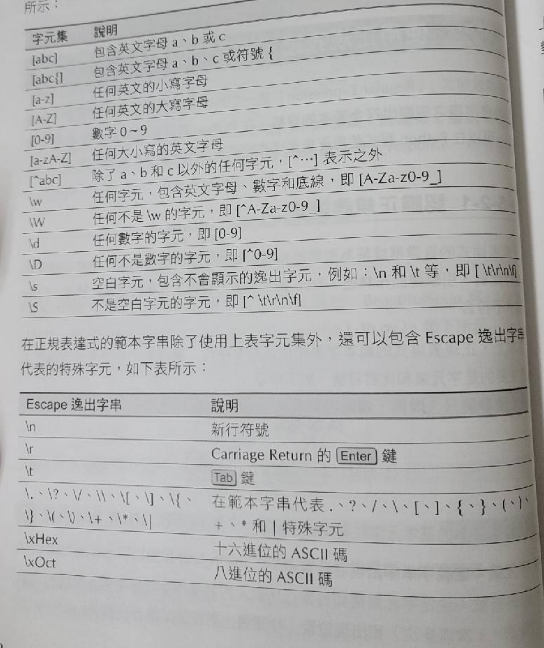

* Also can use () as substring, ex:
* "a(bc)*" 
* "(b | ef)gh"
* "[0-9]+"

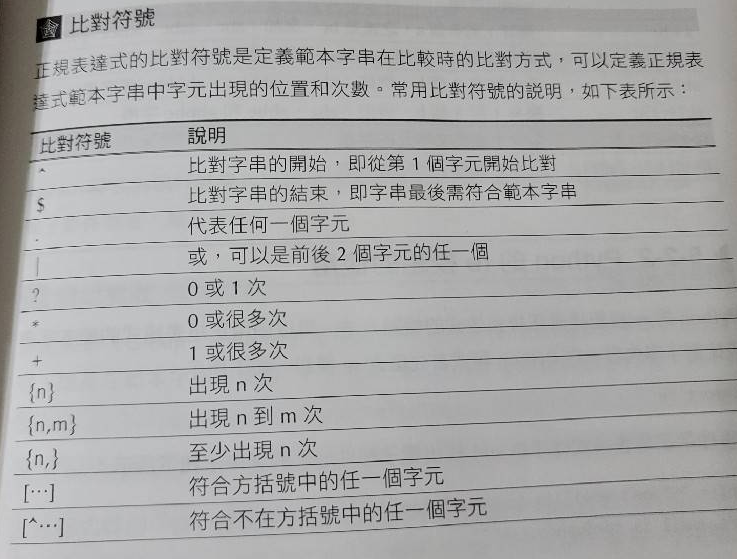

#### Some samples:

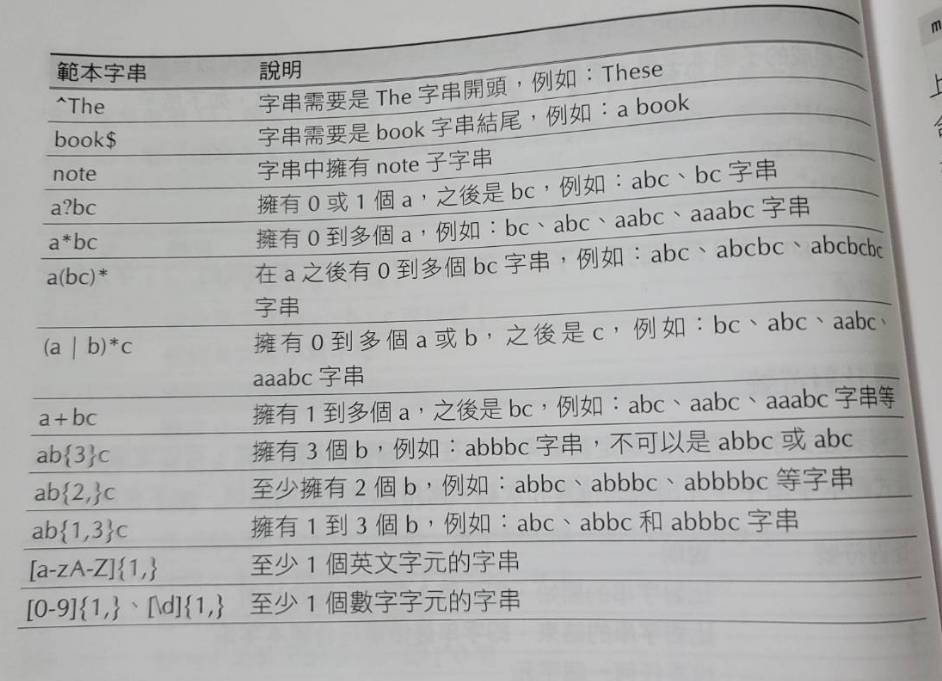


### 5-2-2 Python's re module usage:

1. import re

2. example, use regular expression find the email address of str1

str1 = """Joe's email is joe@gmail.com, Tom's email is tom@yahoo.com"""

#### Use search() method:

* In re's search() can search the first matched substring:

In [36]:
import re

str1 = """Joe's email is joe@gmail.com,  
Tom's email is tom@yahoo.com"""
match = re.search(r"[\w.-]+@[A-Za-z0-9_.-]+", str1)
if match:
    print(match.group())
else:
    print("Doesn't find!")
    



joe@gmail.com


#### Group Capturing

In [37]:
import re

str1 = """Joe's email is joe@gmail.com,  
Tom's email is tom@yahoo.com"""

match = re.search(r"([\w.-]+)@([A-Za-z0-9_.-]+)", str1)
if match:
    print(match.group())
    print(match.group(1))
    print(match.group(2))
else:
    print("沒有找到符合的字串!")
    



joe@gmail.com
joe
gmail.com


#### Use findall() method:

In [38]:
import re

str1 = """Joe's email is joe@gmail.com,  
Tom's email is tom@yahoo.com"""
match = re.findall(r"[\w.-]+@[A-Za-z0-9_.-]+", str1)
if match:
    print(match)
else:
    print("沒有找到符合的字串!")
    



['joe@gmail.com', 'tom@yahoo.com']


#### Use compile() method
* compile() method can let trregular expression string into Pattern Object

In [39]:
import re

str1 = """Joe's email is joe@gmail.com,  
Tom's email is tom@yahoo.com"""
pattern = re.compile(r"[\w.-]+@[A-Za-z0-9_.-]+")
match = re.search(pattern, str1)
if match:
    print(match.group())
else:
    print("沒有找到符合的字串!")
    



joe@gmail.com


### 5-2-3 Use regular expression analyze HTML webpage

In [40]:
# because some of the href value is not started with "http"

import requests
import re

url = "https://fchart.github.io/"
response = requests.get(url)
links = re.findall(r'href="https://.*?"', response.text)
for link in links:
    print(link)



href="https://hueyanchen.github.io/"
href="https://fchart.github.io/MyMind/index_zh-Hant.html"
href="https://drive.google.com/file/d/1NKyh1nl1vwyhHf7mOLj7cxb2g6SpSx57/view?usp=sharing"
href="https://drive.google.com/file/d/1PeCYYT-xA3v9Wn7LiwM2wq8ltvJVwGqY/view?usp=sharing"
href="https://github.com/fchart/fChartExamples2"
href="https://fchart.github.io/fChart6%E4%BD%BF%E7%94%A8%E6%89%8B%E5%86%8A.pdf"
href="https://fchart.github.io/tutorial/"
href="https://fchart.github.io"
href="https://fchart.github.io/fChart6%E4%BD%BF%E7%94%A8%E6%89%8B%E5%86%8A.pdf"
href="https://drive.google.com/file/d/1NKyh1nl1vwyhHf7mOLj7cxb2g6SpSx57/view?usp=sharing"
href="https://drive.google.com/file/d/1NKyh1nl1vwyhHf7mOLj7cxb2g6SpSx57/view?usp=sharing"
href="https://hueyanchen.github.io/"
href="https://drive.google.com/file/d/1VspHydl48PIoeVT7sjw4Gx307UrJUNHB/view?usp=sharing"
href="https://mega.nz/file/SNlw2TyY#XUIiHxhjY90iQsM0fa5Ys1RgaGkm0AmoZDPEU2amfRM"
href="https://drive.google.com/file/d/1fiIEaE55--xofBr

## 5-3 & 5-3-1 Selenium + BeautifulSoup to extract online data

* After using selenium to fetch the HTML, we still can use BeautifulSoup to analyze the HTML tag to get data
* Ex,

In [41]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


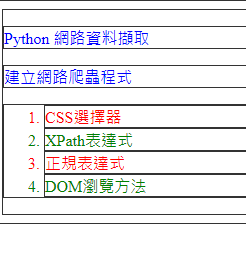

In [52]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/Example.html")
print(driver.title)
print("********************")
print(driver.page_source)
print("********************")

soup = BeautifulSoup(driver.page_source, "lxml")
tag_ol = soup.find("ol", {"id":"list"})
tags_li = tag_ol.find_all("li", class_="line")
for tag in tags_li:
    print(tag.text)
driver.quit()


C:\Users\steve\.virtualenvs\python-web-crawler-c0cPmwO0\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.


Example.html
********************
<html class="line"><head class="line">
<meta charset="utf-8" class="line">
<title class="line">Example.html</title>
<style type="text/css" class="line">
.blue { color: blue; }
.red { color: red; }
.green { color: green; }
.line { border: 1px solid #333; }
</style>
<script src="jquery-3.1.0.min.js" class="line"></script>
<script class="line">
$(document).ready(function() {
   $('*').addClass('line');
   $('p').addClass('blue');
   $('#list').addClass('red');
   $('.item').addClass('green');
});
</script>
</head>
<body class="line">
<p class="line blue">Python 網路資料擷取</p>
<p class="line blue">建立網路爬蟲程式</p>
<ol id="list" class="line red">
  <li class="line">CSS選擇器</li>
  <li class="item line green">XPath表達式</li>
  <li class="line">正規表達式</li>
  <li class="item line green">DOM瀏覽方法</li> 
</ol>

</body></html>
********************
CSS選擇器
XPath表達式
正規表達式
DOM瀏覽方法


### 5-3-2 Use Xpath to locate web data

#### Selenium's find_element_by_XX()

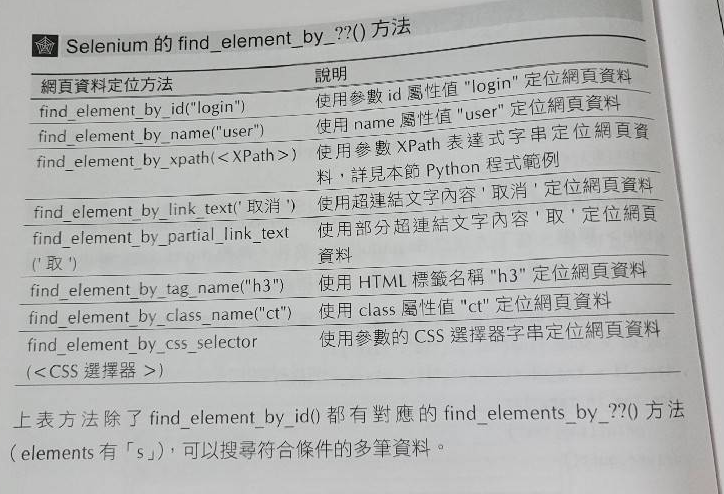

#### Use Xpath:

In [53]:
from selenium import webdriver

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/Example.html")
tag_ol = driver.find_element_by_xpath('//*[@id="list"]')
print(tag_ol.tag_name)
tags_li = tag_ol.find_elements_by_xpath('//li')
for tag in tags_li:
    print(tag.text, tag.get_attribute("class"))
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-c0cPmwO0\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'WebDriver' object has no attribute 'find_element_by_xpath'

Steven Add:
***********************************
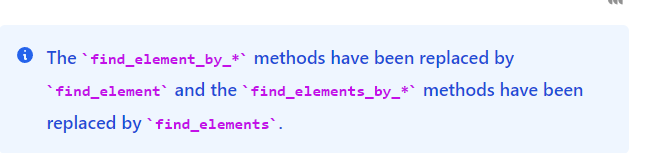
***********************************


In [44]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/Example.html")
tag_ol = driver.find_element(By.XPATH, '//*[@id="list"]')
print(tag_ol.tag_name)
tags_li = tag_ol.find_elements(By.XPATH, '//li')
for tag in tags_li:
    print(tag.text, tag.get_attribute("class"))
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-c0cPmwO0\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.


ol
CSS選擇器 line
XPath表達式 item line green
正規表達式 line
DOM瀏覽方法 item line green


#### Get XPATH:


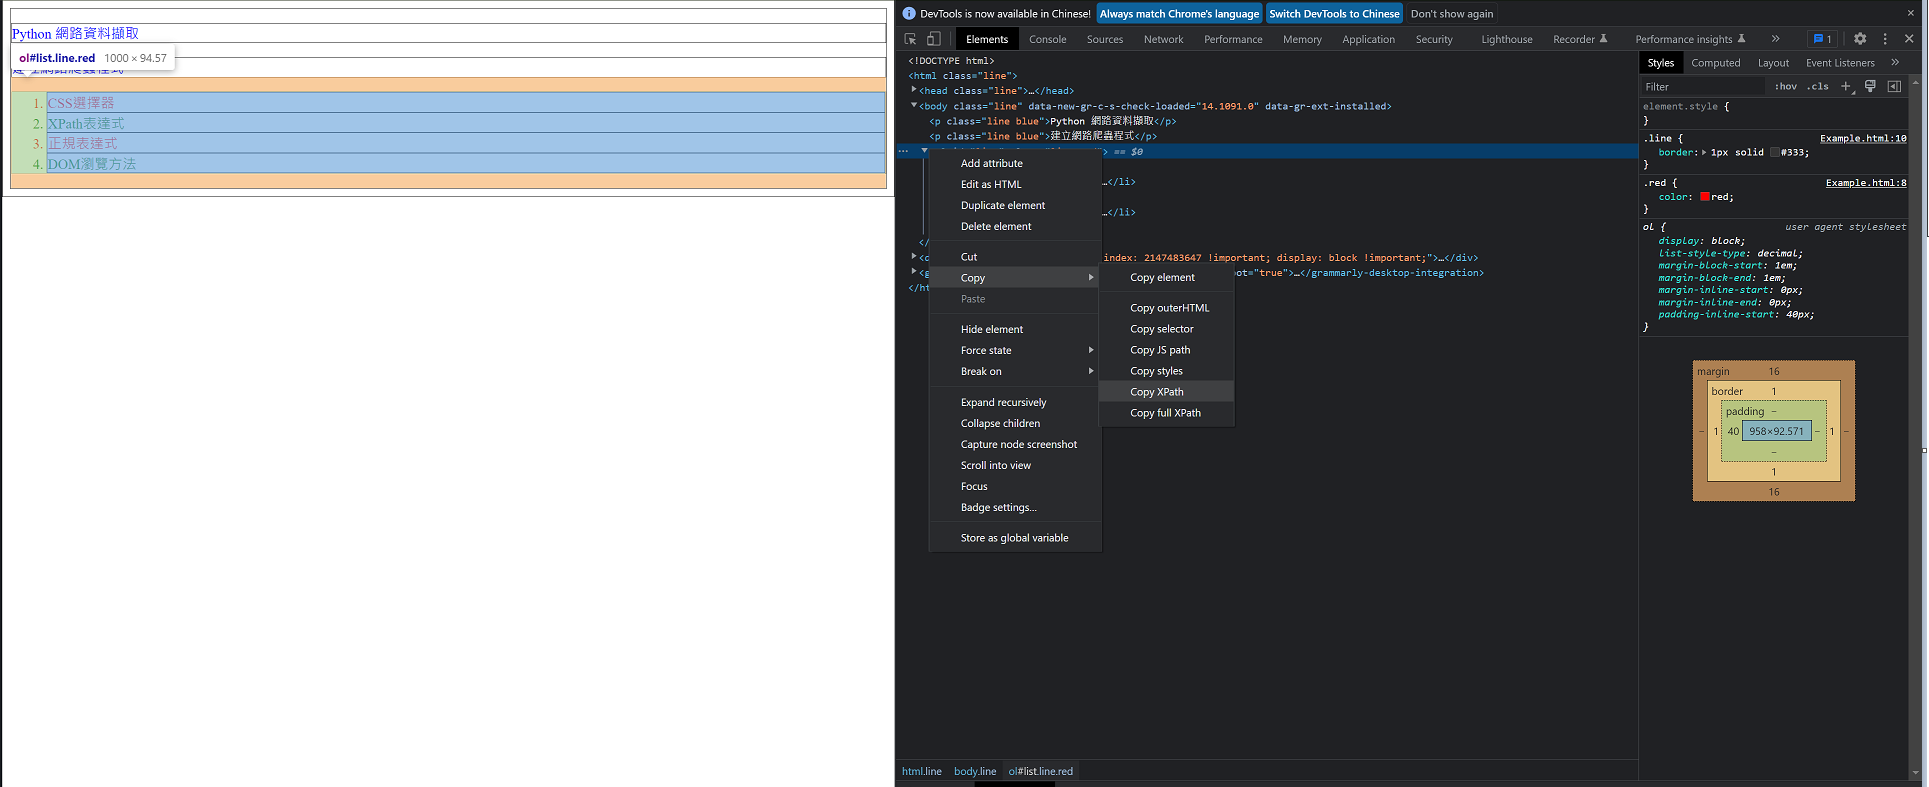

* //*[@id="list"]

* // means relative path
* / is absolute path, ex: /html/body/ol


* Ex,

In [46]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/Example.html")
tag_ol = driver.find_element(By.XPATH, '/html/body/ol')
print(tag_ol.tag_name)
tags_li = tag_ol.find_elements(By.XPATH, '//li')
for tag in tags_li:
    print(tag.text, tag.get_attribute("class"))
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-c0cPmwO0\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.


ol
CSS選擇器 line
XPath表達式 item line green
正規表達式 line
DOM瀏覽方法 item line green


* After using XPath to locate 'ol' tag and use BeautifulSoup analyze all 'li' belong to it

In [48]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/Example.html")
tag_ol = driver.find_element(By.XPATH, '//*[@id="list"]')
print(tag_ol.tag_name)
print(tag_ol.get_attribute('innerHTML'))
soup = BeautifulSoup(tag_ol.get_attribute('innerHTML'), "lxml")
tags_li = soup.find_all("li", class_="line")
for tag in tags_li:
    print(tag.text)
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-c0cPmwO0\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """


ol

  <li class="line">CSS選擇器</li>
  <li class="item line green">XPath表達式</li>
  <li class="line">正規表達式</li>
  <li class="item line green">DOM瀏覽方法</li> 

CSS選擇器
XPath表達式
正規表達式
DOM瀏覽方法


# HW:
## Print this table HTML content from: https://www.twse.com.tw/zh/ (台灣證交所)
### * You can use request/bs4/selenium ...etc any module we mentioend


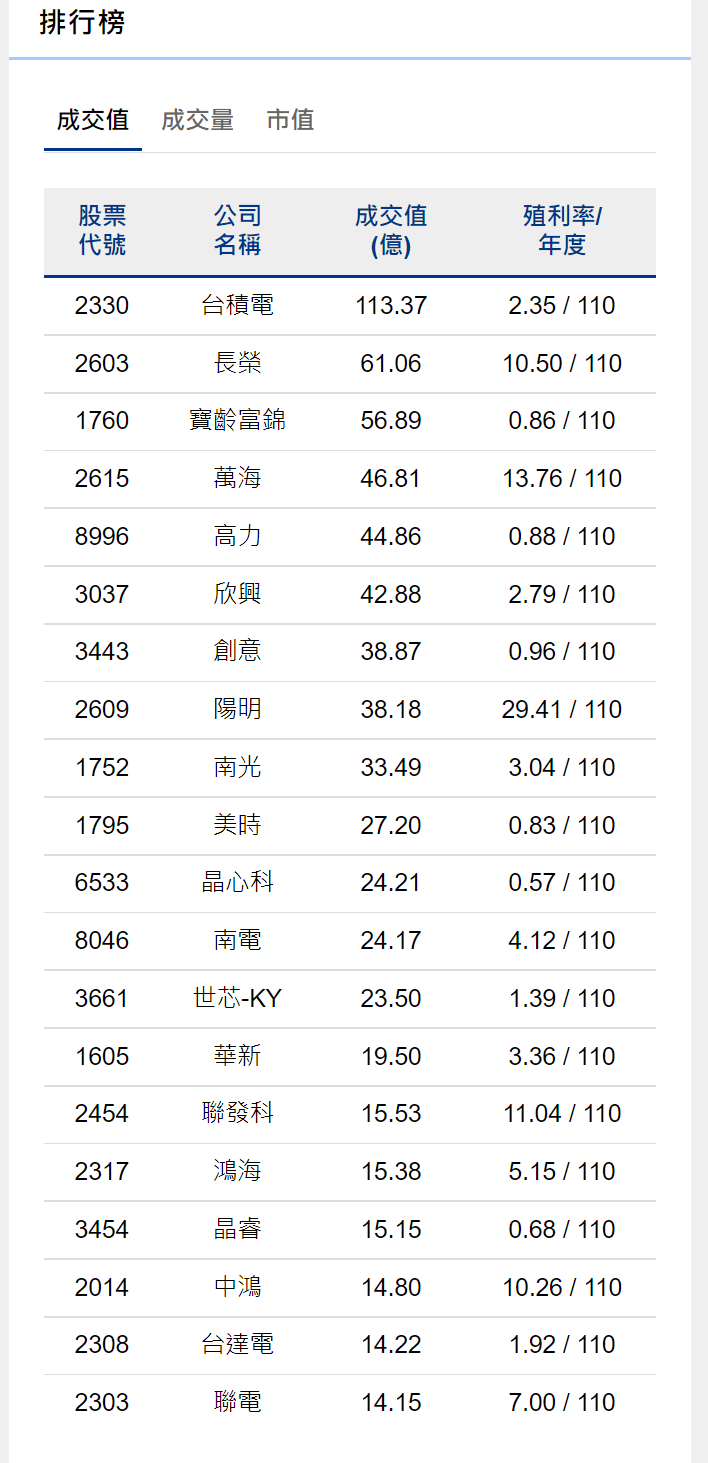

# HW1

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://www.twse.com.tw/zh/")
tag_section = driver.find_element(By.XPATH, '//*[@id="main"]/div[5]/div[2]/section[1]')
soup = BeautifulSoup(tag_section.get_attribute('innerHTML'), "lxml")
for ele in soup:
    print(ele)
driver.quit()

C:\Users\zhche\.virtualenvs\python-web-crawler-Su6T56j7\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """


<html><body><h2>排行榜</h2>
<div class="content ranking">
<div class="tabs">
<ul>
<li class="active">成交值</li>
<li>成交量</li>
<li>市值</li>
</ul>
<div class="body loading active" data-handler="ranking"></div>
<div class="body loading" data-handler="ranking"></div>
<div class="body loading" data-handler="ranking"></div>
</div>
</div>
</body></html>


## 5-4 How to crack anti-crawler mechanism

There are two basic anti-crawler mechanisms:

#### Examine User-agent in HTTP heading
sol: Use fake-useragent package to pretend the request is sending from the browser

#### Examine plenty of requests sending from the same IP in a short time
sol: 
1. Use Time.sleep() in python 
2. Use Rotate Proxies to change IP address dynamically

### 5-4-1 fake-useragent package

In [2]:
pip install fake_useragent

     -------------------------------------- 50.4/50.4 kB 368.1 kB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from fake_useragent import UserAgent
ua = UserAgent()
print(ua.ie)
print(ua.google)
print(ua.firefox)
print(ua.safari)

# or

print(ua.random)

Mozilla/4.0 (compatible; MSIE 5.12; Mac_PowerPC)
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.611.0 Chrome/10.0.611.0 Safari/534.15
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.5; en-US; rv:1.9.1b3pre) Gecko/20090204 Firefox/3.1b3pre
Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_4_11; ja-jp) AppleWebKit/533.16 (KHTML, like Gecko) Version/4.1 Safari/533.16
Mozilla/4.0 (compatible; MSIE 5.50; Windows 98; SiteKiosk 4.8)


### Use fake-useragent to send HTTP request

In [5]:
from fake_useragent import UserAgent
import requests
ua = UserAgent()
headers = {'user-agent': ua.random}
url = 'https://www.momoshop.com.tw/main/Main.jsp'
r = requests.get(url, headers=headers)
print(r.status_code)
print(r.text)

200


 




























 


















 

<!DOCTYPE HTML>















































<html lang="zh">
<head>
<link rel="shortcut icon" href="/main/favicon.ico"/>
<link rel="Bookmark" href="/main/favicon.ico"/>
<link rel="icon" href="/main/favicon.ico" type="image/ico"/>
<link rel="search" href="/search/openSearch.xml" type="application/opensearchdescription+xml" title= momo購物網 - 好評推薦 - 2023年1月/>


<link rel="canonical" href="https://www.momoshop.com.tw">
<link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.momoshop.com.tw">


<title>momo&#36092;&#29289;&#32178; - 好評推薦 - 2023年1月</title>


<script type="application/ld+json">
{
"@context":"https://schema.org",
"@type":"Organization",
"url":"https://www.momoshop.com.tw",
"logo":"https://m.momoshop.com.tw/img/message.png"
}
</script>

<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name=

### 5-4-2 Use Rotate Proxies to change IP address
Rotate Proxies use Proxy Server from Proxy Pool to assign a new IP address, which mean, Python can use 1000 different IP address to send 1000 HTTP requests

### Free Proxy List
We can get free proxy server from https://free-proxy-list.net/
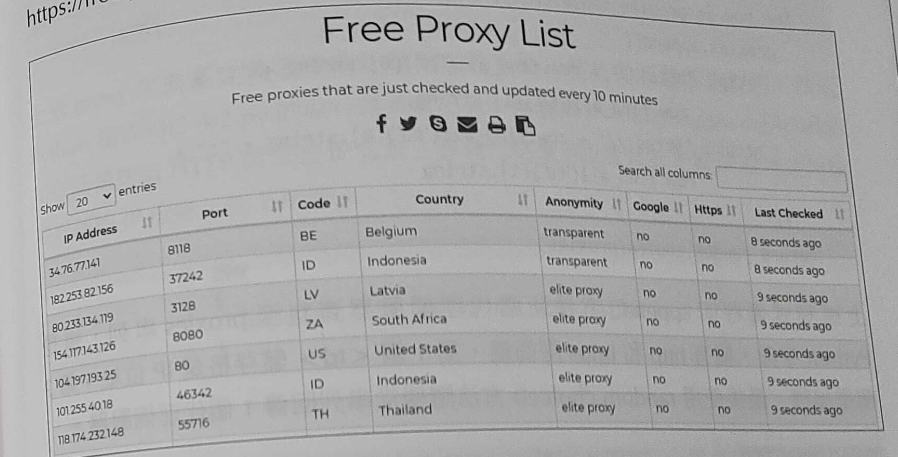

### Use script to get the proxy server

In [9]:
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import requests
import random
ua = UserAgent()

def proxyGenerator():
    headers = {'user-agent': ua.random}
    res = requests.get('https://free-proxy-list.net/', headers=headers)
    soup = BeautifulSoup(res.text, 'lxml')
    proxies_table = soup.find('tbody')
    proxies = []
    for row in proxies_table.find_all('tr'):
        proxies.append({
            'http': "http://" + row.find_all('td')[0].string + ":" + row.find_all('td')[1].string,
            'https': "https://" + row.find_all('td')[0].string + ":" + row.find_all('td')[1].string,
        })
    return random.choice(proxies)

for n in range(5):
    proxy = proxyGenerator()
    print(proxy)


{'http': 'http://163.116.158.115:8081', 'https': 'https://163.116.158.115:8081'}
{'http': 'http://103.146.185.107:3127', 'https': 'https://103.146.185.107:3127'}
{'http': 'http://47.88.29.108:1080', 'https': 'https://47.88.29.108:1080'}
{'http': 'http://212.112.113.178:3128', 'https': 'https://212.112.113.178:3128'}
{'http': 'http://51.79.50.22:9300', 'https': 'https://51.79.50.22:9300'}


### Use Proxy to send HTTP request

In [10]:
import requests
proxy = {'http': 'http://163.116.158.115:8081', 'https': 'https://163.116.158.115:8081'}
r = requests.get('http://httpbin.org/ip', proxies=proxy)
print(r.status_code)
print(r.text)

200
{
  "origin": "163.116.158.115"
}



### Use Rotate Proxies to send HTTP request

In [ ]:
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import requests
import random
ua = UserAgent()

def proxyGenerator():
    headers = {'user-agent': ua.random}
    res = requests.get('https://free-proxy-list.net/', headers=headers)
    soup = BeautifulSoup(res.text, 'lxml')
    proxies_table = soup.find('tbody')
    proxies = []
    for row in proxies_table.find_all('tr'):
        proxies.append({
            'http': "http://" + row.find_all('td')[0].string + ":" + row.find_all('td')[1].string,
            'https': "https://" + row.find_all('td')[0].string + ":" + row.find_all('td')[1].string,
        })
    return random.choice(proxies)

while True:
    proxy = proxyGenerator()
    print('Current Proxy Server:', proxy)
    try:
        headers = {'user-agent': ua.random}
        url = "http://httpbin.org/ip"
        r = requests.get(url, headers=headers, proxies=proxy, verify=false)
        print(r.status_code)
        print(r.text)
        break
    except:
        print('Connect Error! Search anotehr Proxy Server!')
        pass

Current Proxy Server: {'http': 'http://174.70.1.210:8080', 'https': 'https://174.70.1.210:8080'}
Connect Error! Search anotehr Proxy Server!
Current Proxy Server: {'http': 'http://5.58.110.249:8080', 'https': 'https://5.58.110.249:8080'}
Connect Error! Search anotehr Proxy Server!
Current Proxy Server: {'http': 'http://221.132.28.18:8090', 'https': 'https://221.132.28.18:8090'}
Connect Error! Search anotehr Proxy Server!


## 5-5 Usage: BBC News List

In [12]:
import requests 
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import csv

csvfile = "news.csv"
driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://www.bbc.com/zhongwen/trad/business")
tag_ul = driver.find_element(By.XPATH, '//*[@id="main-wrapper"]/div/main/div/div[2]/ul')
soup = BeautifulSoup(tag_ul.get_attribute('innerHTML'), "lxml")
tags_li = soup.find_all("li")
output = []
for tag in tags_li:
    item = []
    title = tag.find("h2")
    item.append(title.text.strip())
    a = tag.find("a")
    item.append(a.get("href", None))
    output.append(item)
    
print(output)
driver.quit()

C:\Users\zhche\.virtualenvs\python-web-crawler-Su6T56j7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


[['美中芯片戰：技術爭端如何上演', 'https://www.bbc.com/zhongwen/trad/world-64010198'], ['數位資產交易平台FTX亂局下，加密貨幣是否要完？', 'https://www.bbc.com/zhongwen/trad/business-63996345'], ['烏克蘭戰爭：2022年末西方對俄國的石油制裁與中國和印度的作用', 'https://www.bbc.com/zhongwen/trad/world-63890052'], ['習近平訪問沙特：中國和沙特分別想得到什麼？', 'https://www.bbc.com/zhongwen/trad/chinese-news-63885600'], ['能源危機中卡塔爾與中國簽署「史上最長」液化天然氣供應協議', 'https://www.bbc.com/zhongwen/trad/chinese-news-63703938'], ['薩姆·班克曼-弗里德：「加密貨幣大王」的墮落', 'https://www.bbc.com/zhongwen/trad/business-63620144'], ['從英國央行大幅加息看利率對普通人和經濟的影響', 'https://www.bbc.com/zhongwen/trad/business-63511036'], ['德國總理肖爾茨首次訪問中國的看點、意義和輿論', 'https://www.bbc.com/zhongwen/trad/world-63458151'], ['以史為鑒：20 世紀三次全球經濟危機揭示了什麼', 'https://www.bbc.com/zhongwen/trad/business-63093744'], ['英國首相夫人穆爾蒂：蘇納克的妻子是誰？', 'https://www.bbc.com/zhongwen/trad/uk-63444114'], ['世界首富馬斯克收購推特的一波三折', 'https://www.bbc.com/zhongwen/trad/world-63401110'], ['澳大利亞在稀土產業上向中國發起挑戰', 'https://www.bbc.com/zhongwen/trad/business-63296053'], ['兩岸關係緊張之下，台灣果農面臨的

## 5-6 Usage: Selenium auto login facebook

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time

email_address = "xxxxxx"
password = "123456"

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
url = "https://www.facebook.com/"
driver.get(url)

email = driver.find_element(By.CSS_SELECTOR,"#email")
email.send_keys(email_address)
time.sleep(0.5)
passwd = driver.find_element(By.CSS_SELECTOR,"#pass")
passwd.send_keys(password)
time.sleep(0.5)
button = driver.find_element(By.CSS_SELECTOR,"#loginbutton")
button.click()
time.sleep(5)
soup = BeautifulSoup(driver.page_source, "lxml")
tag_title = soup.find("title")
print(tag_title.text)
driver.quit()